# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [95]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [96]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head(20)

,height,weight,age,male
0,151.7650,47.825606,63.0,1
1,139.7000,36.485807,63.0,0
2,136.5250,31.864838,65.0,0
3,156.8450,53.041914,41.0,1
4,145.4150,41.276872,51.0,0
5,163.8300,62.992589,35.0,1
6,149.2250,38.243476,32.0,0
7,168.9100,55.479971,27.0,1
8,147.9550,34.869885,19.0,0
9,165.1000,54.487739,54.0,1


## Task 1. Prior predictive checks

In [97]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=21,refresh=R)

df = sim.draws_pd()
df.head(20)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,173.924,10.42040,181.845
1,0.0,0.0,144.043,10.87950,153.013
2,0.0,0.0,164.703,16.32730,147.927
3,0.0,0.0,159.445,10.90560,158.161
4,0.0,0.0,174.710,10.09930,178.151
5,0.0,0.0,167.095,11.94990,164.637
6,0.0,0.0,180.793,10.54060,179.667
7,0.0,0.0,176.448,6.94553,169.129
8,0.0,0.0,166.218,9.25966,160.531
9,0.0,0.0,161.391,7.09576,151.204




1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

Text(0.5, 1.0, 'Height distribution')

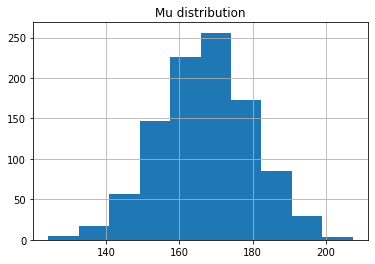

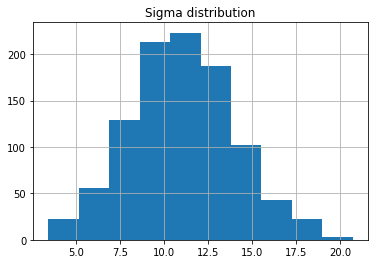

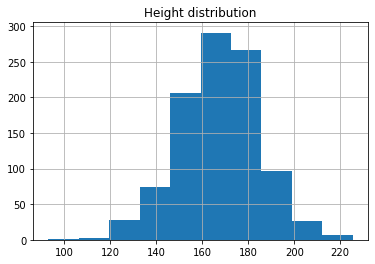

In [98]:
plt.figure()
df["mu"].hist()
plt.title("Mu distribution")
plt.figure()
df["sigma"].hist()
plt.title("Sigma distribution")
plt.figure()
df["height"].hist()
plt.title("Height distribution")

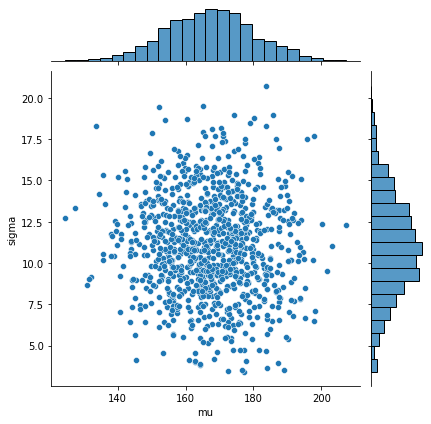

In [99]:
# joint distribution of mu and sigma

sns.jointplot(data=df, x="mu", y="sigma")
print()

## Task 2. Model fit and evaluation

In [100]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [101]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

df = fit.draws_pd()
df.head(20)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height_pred
0,-893.582,0.776707,0.561472,2.0,5.0,0.0,894.911,153.663,8.36450,163.281
1,-892.654,1.000000,0.561472,3.0,7.0,0.0,894.009,155.310,7.23858,137.826
2,-891.074,1.000000,0.561472,2.0,3.0,0.0,893.066,153.872,7.61172,156.724
3,-891.265,0.992799,0.561472,2.0,7.0,0.0,891.376,155.419,7.87928,154.466
4,-891.706,0.922205,0.561472,2.0,3.0,0.0,892.925,153.903,8.19200,139.579
5,-891.353,1.000000,0.561472,1.0,1.0,0.0,891.801,154.029,8.20861,144.124
6,-889.678,0.993571,0.561472,2.0,3.0,0.0,891.506,154.305,7.87860,153.849
7,-889.538,1.000000,0.561472,3.0,7.0,0.0,889.663,154.404,7.88121,148.463
8,-889.538,0.749284,0.561472,1.0,3.0,0.0,891.956,154.404,7.88121,153.480
9,-889.577,0.977402,0.561472,2.0,7.0,0.0,889.900,154.323,7.68736,171.454



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


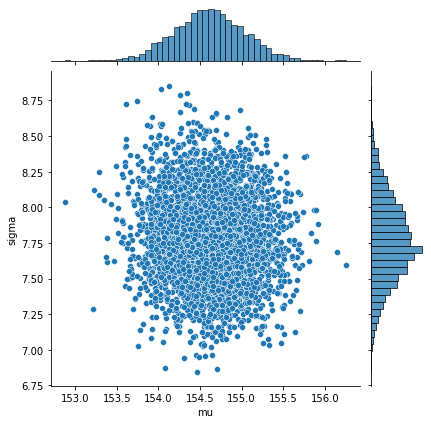

In [102]:
sns.jointplot(data=df, x="mu", y="sigma")
print()

Text(0.5, 1.0, 'Height distribution')

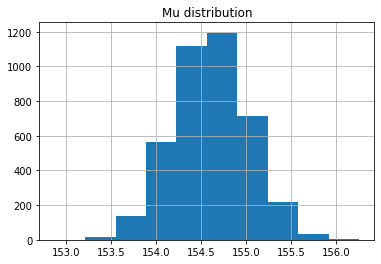

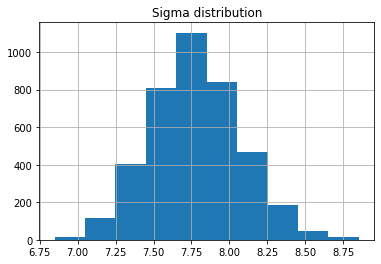

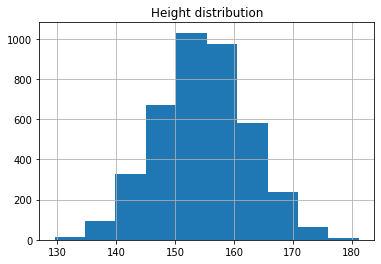

In [103]:
plt.figure()
df["mu"].hist()
plt.title("Mu distribution")
plt.figure()
df["sigma"].hist()
plt.title("Sigma distribution")
plt.figure()
df["height_pred"].hist()
plt.title("Height distribution")

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [104]:
d["c_weight"] = d["weight"] / d["weight"].mean()

data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

## Task 4. Prior predictive checks
 

In [105]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=11)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

Text(0.5, 1.0, 'Beta')

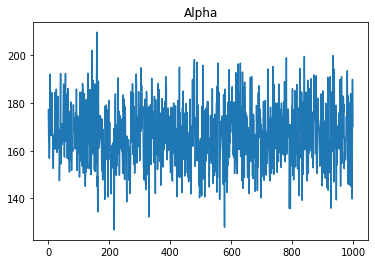

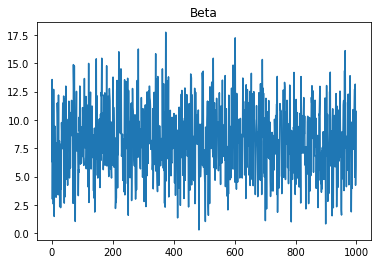

In [106]:
df2 = sim.draws_pd()

df2["a"].plot()
plt.title("Alpha")

plt.figure()
df2["b"].plot()
plt.title("Beta")

In [107]:
print("alpha:")
print(f"Max = {df2['a'].max()}")
print(f"Min = {df2['a'].min()}")
print(f"Mean = {df2['a'].mean()}")
print(f"Std = {df2['a'].std()}")

alpha:
Max = 209.658
Min = 126.78
Mean = 166.533082
Std = 12.63675112615186


## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [108]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [109]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

df3 = sim.draws_pd()
df3.head(10)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,a,b,height[1],height[2],height[3],height[4],height[5],height[6],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,202.206,2.175330,187.169,205.399,185.709,207.003,219.418,233.315,...,218.519,220.116,229.508,225.076,208.473,187.153,198.157,201.651,215.149,208.961
1,0.0,0.0,175.367,0.301518,175.487,175.532,191.377,185.463,185.209,190.913,...,171.960,184.623,210.508,175.446,164.066,173.734,163.392,182.482,162.250,174.492
2,0.0,0.0,183.957,0.926916,179.047,169.809,168.740,203.052,182.204,182.581,...,177.194,184.351,187.403,207.909,167.957,204.875,189.585,210.685,185.371,198.191
3,0.0,0.0,172.837,0.960919,176.276,160.747,170.221,166.940,190.834,164.993,...,164.067,185.652,177.813,185.326,181.375,176.141,179.234,192.809,168.452,167.952
4,0.0,0.0,178.605,0.619496,184.306,174.408,166.136,200.783,169.933,145.144,...,187.805,169.980,170.359,165.832,194.718,199.874,196.487,169.954,181.784,177.684
5,0.0,0.0,161.139,0.587912,171.399,169.034,150.983,152.259,138.552,149.758,...,149.084,155.348,158.348,181.064,169.978,172.991,169.135,159.266,156.313,140.849
6,0.0,0.0,171.369,1.296410,152.956,148.735,159.410,184.538,187.366,196.612,...,177.296,191.014,185.294,158.421,183.749,152.973,173.912,159.457,172.574,177.896
7,0.0,0.0,182.728,0.337035,179.120,190.485,192.434,199.212,173.145,178.313,...,166.591,199.941,152.319,168.976,174.224,204.117,194.403,197.342,148.344,156.948
8,0.0,0.0,175.473,0.618537,184.825,162.302,161.006,190.971,168.732,171.481,...,183.743,166.625,195.021,171.499,183.242,168.009,168.041,180.243,182.652,167.495
9,0.0,0.0,161.842,0.666117,175.682,163.710,170.677,176.532,159.960,132.543,...,159.704,156.137,170.450,157.981,150.965,143.411,149.836,164.332,144.370,154.425


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

Text(0.5, 1.0, 'Beta')

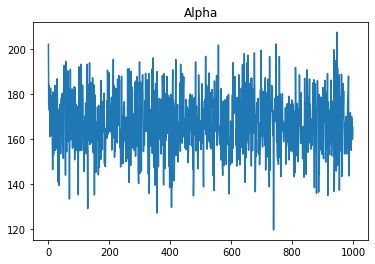

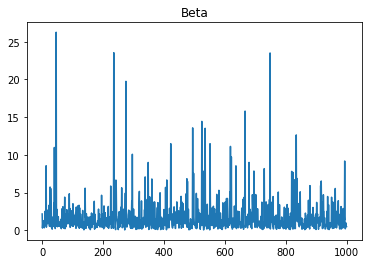

In [110]:
df3["a"].plot()
plt.title("Alpha")

plt.figure()
df3["b"].plot()
plt.title("Beta")

In [111]:
print(f"Alpha min: {df3['a'].min()}")
print(f"Alpha max: {df3['a'].max()}")

Alpha min: 119.734
Alpha max: 207.565


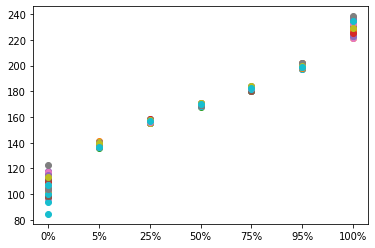

In [112]:
qtls = [0, 5, 25, 50, 75, 95, 100]
xaxis = [f"{i}%" for i in qtls]
for i in range(1, data_sim["N"]+1):
    vals = [df3[f"height[{i}]"].quantile(q/100) for q in qtls]
    plt.scatter(xaxis, vals)

## Task 6. Fitting and evaluating model


In [113]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [114]:
N = 50
data_fit = {'N': N, 'weight': d["weight"].values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

df4 = fit.draws_pd()
df4.head(10)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,b,a,sig,...,v_mu[42],v_mu[43],v_mu[44],v_mu[45],v_mu[46],v_mu[47],v_mu[48],v_mu[49],v_mu[50],height_pred
0,-3.348500,0.907016,0.713161,3.0,7.0,0.0,4.09531,1.424390,149.338,14.46120,...,232.806,215.886,212.332,221.840,226.708,214.715,217.744,223.720,217.178,238.294
1,-1.576900,0.997693,0.713161,3.0,7.0,0.0,3.65614,-0.632959,184.261,8.15359,...,147.171,154.689,156.268,152.043,149.880,155.210,153.864,151.208,154.115,163.790
2,-0.910051,0.935776,0.713161,3.0,7.0,0.0,3.72547,0.791622,159.448,13.43680,...,205.836,196.433,194.458,199.742,202.447,195.782,197.465,200.786,197.151,219.348
3,-2.813090,0.886194,0.713161,2.0,3.0,0.0,3.45272,0.304120,152.531,11.50730,...,170.352,166.740,165.981,168.011,169.050,166.490,167.136,168.412,167.016,166.429
4,-2.912890,0.972180,0.713161,3.0,7.0,0.0,5.29737,1.331080,188.436,10.81100,...,266.435,250.624,247.303,256.188,260.737,249.530,252.360,257.945,251.832,253.696
5,-1.334940,1.000000,0.713161,2.0,3.0,0.0,2.91531,0.529721,182.318,10.12130,...,213.358,207.066,205.745,209.280,211.091,206.631,207.757,209.980,207.547,211.868
6,-0.123939,1.000000,0.713161,2.0,3.0,0.0,1.36816,-0.303708,166.425,12.17250,...,148.628,152.236,152.993,150.966,149.928,152.485,151.839,150.565,151.960,135.879
7,-0.994271,0.930610,0.713161,3.0,7.0,0.0,1.53901,-0.244429,174.333,10.38000,...,160.010,162.914,163.524,161.892,161.057,163.115,162.595,161.569,162.692,155.548
8,-0.905975,0.903428,0.713161,2.0,3.0,0.0,2.71141,0.570566,162.357,10.25790,...,195.792,189.014,187.591,191.399,193.349,188.545,189.758,192.152,189.532,174.298
9,-3.921460,0.767227,0.713161,2.0,3.0,0.0,4.89551,-0.542074,133.625,13.59980,...,101.860,108.299,109.652,106.033,104.181,108.745,107.592,105.318,107.808,119.664


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


Text(0.5, 1.0, 'Beta')

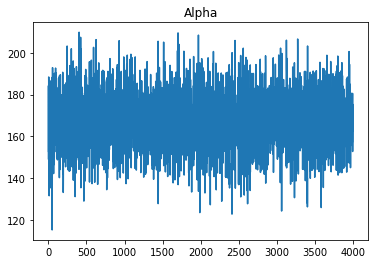

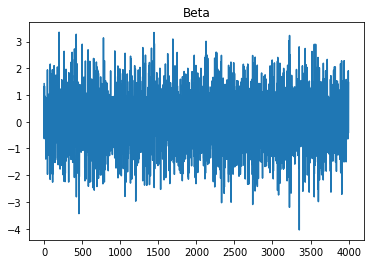

In [115]:
df4["a"].plot()
plt.title("Alpha")

plt.figure()
df4["b"].plot()
plt.title("Beta")

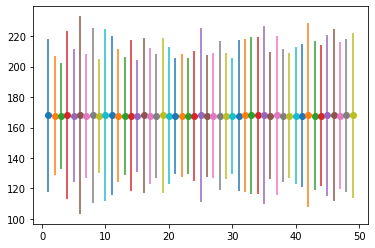

In [116]:

for i in range(1, data_sim["N"]):
    plt.scatter(i, df4[f"v_mu[{i}]"].mean())
    plt.errorbar(i, df4[f"v_mu[{i}]"].mean(), df4[f"v_mu[{i}]"].std())


## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 